8274


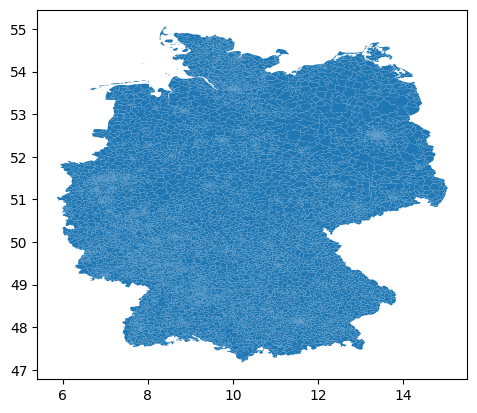

In [1]:
import osmnx as ox
import geopandas as gpd
import json
from shapely.geometry import MultiPolygon, Polygon

# Set the default CRS to EPSG:25832 for consistent spatial reference
ox.settings.default_crs = "epsg:25832"

# Initialize a GeoDataFrame ('gdf') and a list ('mongo_data_list') for data storage
gdf = gpd.GeoDataFrame()
mongo_data_list = []

def create_postal_code_gdf(place_name, tags):
    global gdf, mongo_data_list  # Utilize global GeoDataFrame and list

    # Fetch place polygons using OpenStreetMap data
    place_polygons = ox.features_from_place(place_name, tags)

    # Filter for valid geometries: Polygons and MultiPolygons
    polygon_mask = place_polygons['geometry'].apply(lambda geom: isinstance(geom, (Polygon, MultiPolygon)))

    # Create a GeoDataFrame containing only rows with valid geometries and postal codes
    gdf = gpd.GeoDataFrame(place_polygons[polygon_mask].dropna(subset=['postal_code', 'geometry']))

    # Keep only the necessary columns
    columns_to_keep = ['geometry', 'postal_code']
    gdf = gdf[columns_to_keep]

    # List to store dictionaries with postal codes and GeoJSON geometries
    for idx, row in gdf.iterrows():
        postal_code = row['postal_code']
        geometry = row['geometry']

        # Convert Shapely geometry to GeoJSON format
        geojson_geometry = json.loads(gpd.GeoSeries(geometry).to_json())['features'][0]['geometry']

        # Create a dictionary with postal code and GeoJSON geometry
        postal_code_data = {
            "type": "Feature",
            "properties": {
                "postal_code": postal_code
            },
            "geometry": geojson_geometry
        }

        # Add the dictionary to the list
        mongo_data_list.append(postal_code_data)

# Example usage of the function
place_name = "Germany"
tags = {"boundary": "postal_code"}

# Call the function to populate the GeoDataFrame and the list
create_postal_code_gdf(place_name, tags)

# GeoDataFrame 'gdf' now contains valid geometries and associated postal codes
# List 'mongo_data_list' holds dictionaries with postal codes and GeoJSON geometries

# Save GeoJSON data to a file for further use
with open(f'{place_name}_postal_codes.geojson', 'w') as file:
    json.dump({"type": "FeatureCollection", "features": mongo_data_list}, file, indent=2)

# Plot the GeoDataFrame for visualization
gdf.plot()

# Print the length of the list 'mongo_data_list'
print(len(mongo_data_list))


In [2]:
gdf

geometry  \
element_type osmid                                                         
relation     158144    POLYGON ((6.711 50.645, 6.712 50.646, 6.713 50...   
             308599    POLYGON ((8.550 48.792, 8.550 48.792, 8.550 48...   
             387540    POLYGON ((9.303 50.046, 9.303 50.046, 9.306 50...   
             534826    POLYGON ((9.218 49.965, 9.220 49.966, 9.221 49...   
             534828    POLYGON ((9.288 49.867, 9.288 49.867, 9.288 49...   
...                                                                  ...   
             13529276  POLYGON ((6.012 50.244, 6.013 50.244, 6.013 50...   
             15519988  POLYGON ((8.981 49.608, 8.983 49.607, 8.984 49...   
             16378151  POLYGON ((10.166 47.369, 10.167 47.369, 10.168...   
             16378166  POLYGON ((10.070 47.332, 10.070 47.333, 10.071...   
             16378181  POLYGON ((10.079 47.324, 10.135 47.325, 10.146...   

                      postal_code  
element_type osmid                 
relation     158144         53881  
             308599         75339  
             387540         63869  
             534826         63856  
             534828         63874  
...                           ...  
             13529276        4791  
             15519988       64743  
             16378151       87567  
             16378166       87568  
             16378181       87569  

[8274 rows x 2 columns]

In [24]:
# Filter and find MultiPolygons from the GeoDataFrame
multipolygons_gdf = gdf[gdf['geometry'].apply(lambda geom: isinstance(geom, MultiPolygon))]
multipolygons_gdf

geometry  \
element_type osmid                                                         
relation     907171    MULTIPOLYGON (((7.975 49.173, 7.975 49.174, 7....   
             907175    MULTIPOLYGON (((7.802 49.131, 7.803 49.131, 7....   
             907186    MULTIPOLYGON (((8.242 48.776, 8.243 48.778, 8....   
             907200    MULTIPOLYGON (((8.508 49.190, 8.509 49.190, 8....   
             907202    MULTIPOLYGON (((7.827 49.247, 7.826 49.248, 7....   
...                                                                  ...   
             3388148   MULTIPOLYGON (((9.438 53.746, 9.439 53.747, 9....   
             6687911   MULTIPOLYGON (((9.942 51.959, 9.942 51.959, 9....   
             6805439   MULTIPOLYGON (((8.423 50.451, 8.423 50.452, 8....   
             9684903   MULTIPOLYGON (((10.826 50.588, 10.826 50.589, ...   
             12142986  MULTIPOLYGON (((6.037 50.704, 6.038 50.704, 6....   

                      postal_code  
element_type osmid                 
relation     907171         76829  
             907175         76887  
             907186         76532  
             907200         76646  
             907202         76855  
...                           ...  
             3388148        25377  
             6687911        31084  
             6805439        35647  
             9684903        98694  
             12142986        4730  

[394 rows x 2 columns]

In [10]:
polygons_gdf = gdf[gdf['geometry'].apply(lambda geom: isinstance(geom, Polygon))]

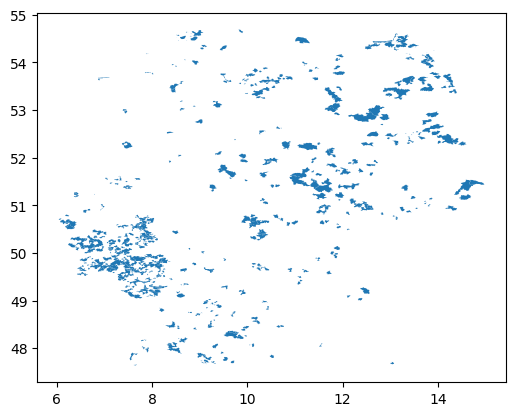

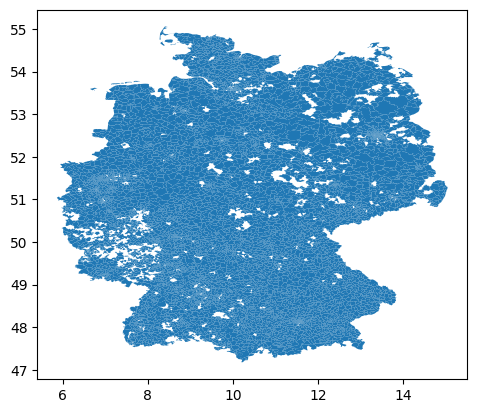

In [11]:
import matplotlib.pyplot as plt

# Assuming you've already created the GeoDataFrame 'multipolygons_gdf'
multipolygons_gdf.plot()
polygons_gdf.plot()
# Show the plot
plt.show()


<Axes: >

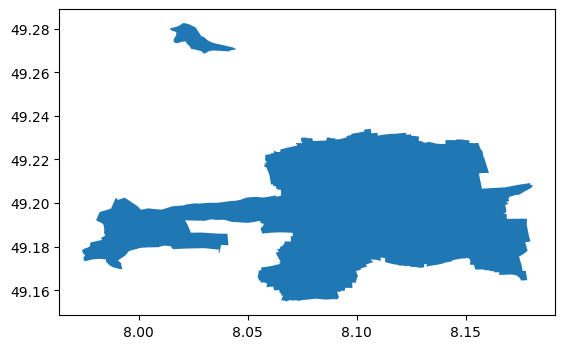

In [25]:
multipolygons_gdf[0:1].plot()

Test Multipoly